# Chapter 2

In [1]:
import os
import pandas as pd
from dataclasses import dataclass

@dataclass
class PSET:
    awd: str = os.getenv('AWD')

    @property
    def data_dir(self) -> str:
        return f'{pset.awd}/data/chapter_2'
    
pset = PSET()
pset

PSET(awd='/Users/rwk/Development/tutorials/intro_linear_regression_analysis')

## setup
___

$$
\newcommand{\prob}[1]{\mathbb{P}\left( #1 \right)}
\newcommand{\exp}[1]{\mathbb{E}\left( #1 \right)}
\newcommand{\var}[1]{\mathbb{V}\text{ar}\left( #1 \right)}
\newcommand{\Xhat}{\hat{X}}
\newcommand{\Xbar}{\bar{X}}
\newcommand{\yhat}{\hat{y}}
\newcommand{\ybar}{\bar{y}}
\newcommand{\xbar}{\bar{x}}
\newcommand{\bz}{\beta_0}
\newcommand{\bo}{\beta_1}
\newcommand{\bzh}{\hat{\beta}_0}
\newcommand{\boh}{\hat{\beta}_1}
\newcommand{\eps}{\varepsilon}
\newcommand{\sse}{SS_\textrm{Res}}
\newcommand{\sst}{SS_\textrm{T}}
\newcommand{\ssr}{SS_\textrm{R}}
\newcommand{\mse}{MS_\textrm{Res}}
\newcommand{\mst}{MS_\textrm{T}}
\newcommand{\msr}{MS_\textrm{R}}
\newcommand{\sumi}{\sum_{i=1}^n}
\newcommand{\sumj}{\sum_{j=1}^n}
\newcommand{\Sxx}{S_{xx}}
\newcommand{\Sxy}{S_{xy}}
\newcommand{\sqh}{\hat{\sigma}^2}
$$

\begin{align*}
\textrm{\\prob\{X\}} &\rightarrow \prob{X} \\
\textrm{\\exp\{X\}} &\rightarrow \exp{X} \\
\textrm{\\var\{X\}} &\rightarrow \var{X} \\
\textrm{\\Xhat} &\rightarrow \Xhat \\
\textrm{\\Xbar} &\rightarrow \Xbar \\
\textrm{\\yhat} &\rightarrow \yhat \\
\textrm{\\ybar} &\rightarrow \ybar \\
\textrm{\\xbar} &\rightarrow \xbar \\
\textrm{\\bz} &\rightarrow \bz \\
\textrm{\\bo} &\rightarrow \bo \\
\textrm{\\bzh} &\rightarrow \bzh \\
\textrm{\\boh} &\rightarrow \boh \\
\textrm{\\eps} &\rightarrow \eps \\
\textrm{\\sse} &\rightarrow \sse \\
\textrm{\\sst} &\rightarrow \sst \\
\textrm{\\ssr} &\rightarrow \ssr \\
\textrm{\\mse} &\rightarrow \mse \\
\textrm{\\mst} &\rightarrow \mst \\
\textrm{\\msr} &\rightarrow \msr \\
\textrm{\\sumi} &\rightarrow \sumi \\
\textrm{\\sumj} &\rightarrow \sumj \\
\textrm{\\Sxx} &\rightarrow \Sxx \\
\textrm{\\Sxy} &\rightarrow \Sxy \\
\textrm{\\sqh} &\rightarrow \sqh \\
\end{align*}


## 2.1 SIMPLE LINEAR REGRESSION MODEL
___

The goal is to model the relationship between a response, $y$ and a single regressor (or feature), $x$.

$$y = f(x) + \eps$$

where the function, $f(x)$, unknown.
First, consider the **simple linear regression model**, that is, a model that assumes the relationship is a straight line.

$$y = \bz + \bo x + \eps$$

Here we'll assume that $x$ is unknown data (i.e., not random) and $y$ is the response which we treat as a random variable.  Thus

\begin{align*}
\exp{y | x} &= \bz + \bo x \\
\var{y | x} &= \var{\bz + \bo x + \eps} = \sigma^2
\end{align*}

Notes:
 * the mean of $y$ is a function of $x$
 * the variance does not depend on $x$
 * the errors are uncorrelated
 * the parameters $\bz$ and $\bo$ are called the **regression coefficients**

## 2.2 LEAST-SQUARES ESTIMATION OF THE PARAMETERS
___

The parameters $\bz$ and $\bo$ are unknown and must be estimated from the sample data, $(y_1, x_1), \dots, (y_n, x_n)$.

### 2.2.1 Estimation of $\bz$ and $\bo$ 

To predict values of $y$, we assume $\exp{\eps}=0$ and $\var{\eps} = \sigma^2$ and take

$$
\yhat = \exp{y | x} = \bz + \bo x 
$$

We define the difference between the predicted value, $\yhat$ and $y$ as the **residual**:

$$e_i = y_i - \yhat_i$$

To find the estimates of the coefficients, we find the $\bz$ and $\bo$ that mininmize the **residual sum of squares**, $\sse$ as

\begin{align*}
\sse &= \sumi e_i^2 \\
     &= \sumi \left(y_i - \yhat_i \right)^2 \\
     &= \sumi \left(y_i - \bz - \bo x_i \right)^2
\end{align*}

Thes the least-square estimates of the coefficients, $\bzh$ and $\boh$, are taken to satisfy the following

\begin{align*}
0 &= \left. \frac{\partial}{\partial \bz} \sse \right|_{\bzh,\boh} = -2 \sumi \left(y_i - \bz - \bo x_i \right) \\
0 &= \left. \frac{\partial}{\partial \bo} \sse \right|_{\bzh,\boh}= -2 \sumi \left(y_i - \bz - \bo x_i \right) x_i
\end{align*}

Solving yields the **least-squares normal questions**

\begin{align*}
n \bzh + \boh\sumi x_i &= \sumi y_i \\
\bzh \sumi x_i + \boh \sumi x_i^2 &= \sumi y_i x_i
\end{align*}

Solving the first equstion fo $\bzh$ and converting to means, we get

$$\bz0 = \ybar - \boh \xbar$$

and then using this to solve for $\boh$

\begin{align*}
\bzh = \frac{\sumi y_i x_i - \frac{\left(\sumi y_i \right) \left(\sumi x_i \right)}{n}}{\sumi x_i^2 - \frac{\left(\sumi x_i \right)^2}{n}}
\end{align*}

Rewrite the using

\begin{align*}
\Sxx &= \sumi x_i^2 - \frac{\left(\sumi x_i \right)^2}{n}  = \sumi (x_i - \xbar)^2 \\
\Sxy &= \sumi y_i x_i - \frac{\left(\sumi y_i \right) \left(\sumi x_i \right)}{n} = \sumi y_i (x_i - \xbar)
\end{align*}

Thus, you can write $\boh$

\begin{align*}
\boh = \frac{\Sxy}{\Sxx}
\end{align*}

#### Example 2.2

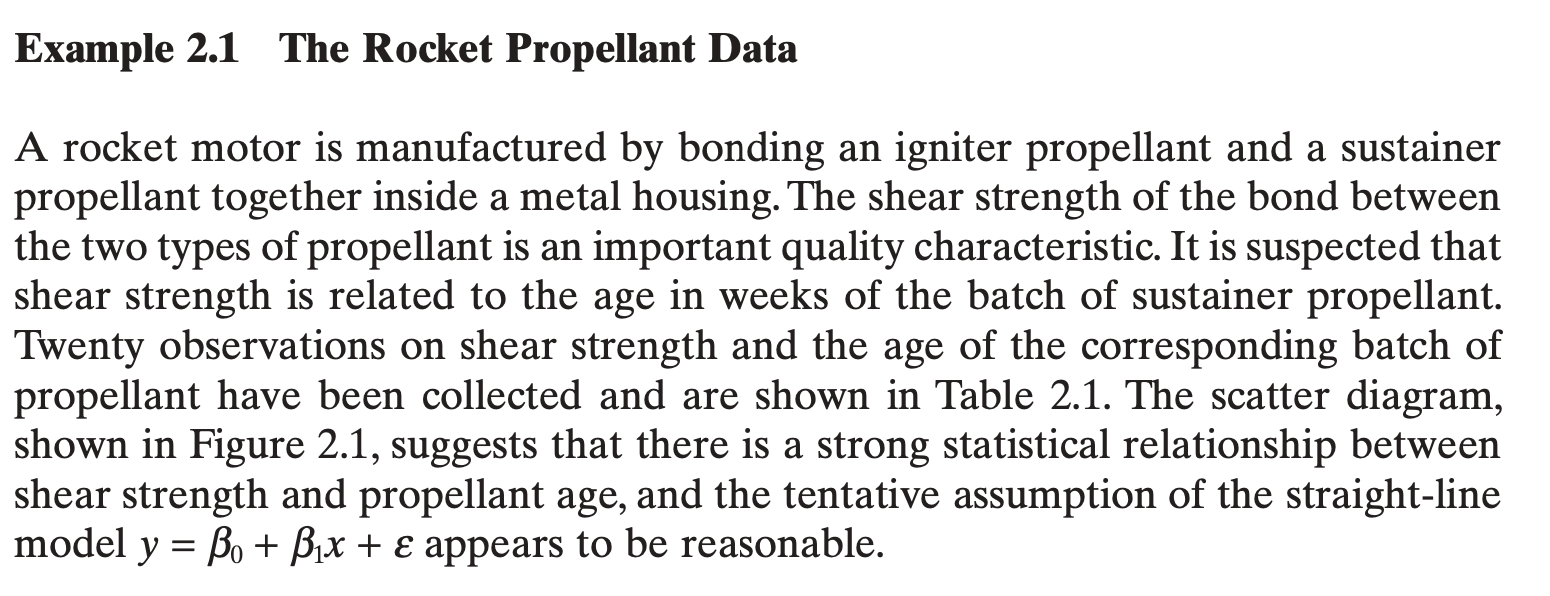

In [2]:
e2p1_df = pd.read_excel(f'{pset.data_dir}/Examples/data-ex-2-1 (Rocket Prop).xls')
e2p1_df

,"Observation, i","Shear Strength, yi (psi)","Age of Propellant, xi (weeks)"
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50
5,6,1708.30,19.00
6,7,1784.70,24.00
7,8,2575.00,2.50
8,9,2357.90,7.50
9,10,2256.70,11.00


In [3]:
e2p1_df.rename(columns={
    'Observation, i'                : 'n',
    'Shear Strength, yi (psi)'      : 'strength',
    'Age of Propellant, xi (weeks)' : 'age',
}, inplace=True)
e2p1_df.head()

,n,strength,age
0,1,2158.70,15.50
1,2,1678.15,23.75
2,3,2316.00,8.00
3,4,2061.30,17.00
4,5,2207.50,5.50


<Axes: xlabel='age', ylabel='strength'>

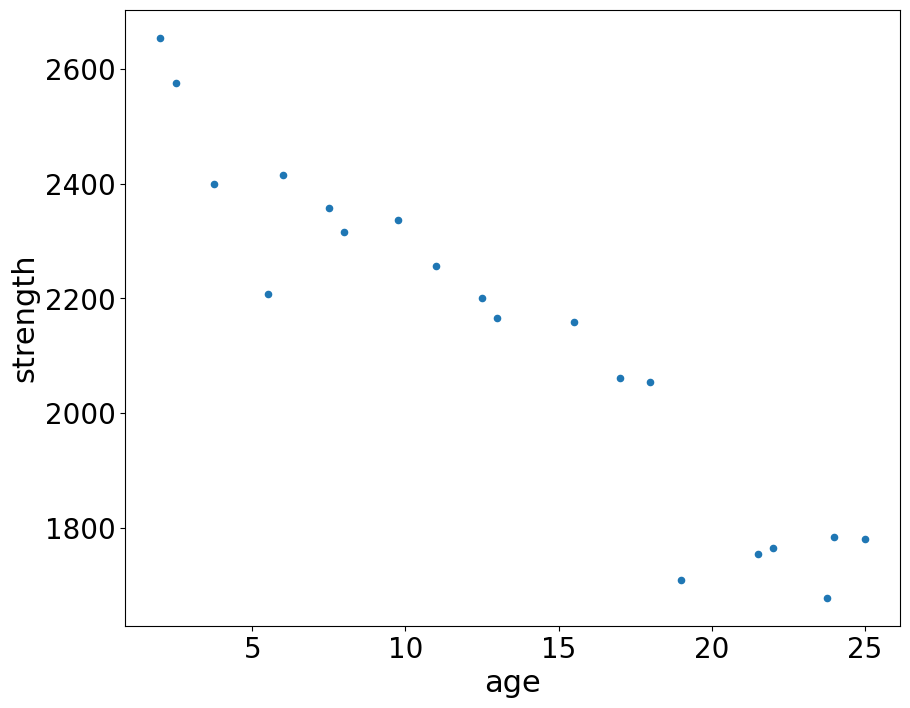

In [4]:
e2p1_df.plot.scatter(x='age', y='strength')

In [5]:
x = e2p1_df.age.values.reshape(-1, 1)
y = e2p1_df.strength.values.reshape(-1, 1)
x.shape, y.shape

((20, 1), (20, 1))

In [6]:
S_xx = ((x - x.mean())**2).sum()
S_xx

np.float64(1106.559375)

In [7]:
S_xy = (y*(x - x.mean())).sum()
S_xy

np.float64(-41112.654375000035)

In [8]:
beta1 = S_xy/S_xx
beta1

np.float64(-37.15359094490527)

In [9]:
beta0 = y.mean() - beta1*x.mean() 
beta0

np.float64(2627.8223590012963)

In [10]:
result_df = e2p1_df.copy()
result_df['y']    = y 
result_df['x']    = x 
result_df['yhat'] = beta0 + beta1*x
result_df['e']    = result_df.y - result_df.yhat 
result_df

,n,strength,age,y,x,yhat,e
0,1,2158.70,15.50,2158.70,15.50,2051.941699,106.758301
1,2,1678.15,23.75,1678.15,23.75,1745.424574,-67.274574
2,3,2316.00,8.00,2316.00,8.00,2330.593631,-14.593631
3,4,2061.30,17.00,2061.30,17.00,1996.211313,65.088687
4,5,2207.50,5.50,2207.50,5.50,2423.477609,-215.977609
5,6,1708.30,19.00,1708.30,19.00,1921.904131,-213.604131
6,7,1784.70,24.00,1784.70,24.00,1736.136176,48.563824
7,8,2575.00,2.50,2575.00,2.50,2534.938382,40.061618
8,9,2357.90,7.50,2357.90,7.50,2349.170427,8.729573
9,10,2256.70,11.00,2256.70,11.00,2219.132859,37.567141


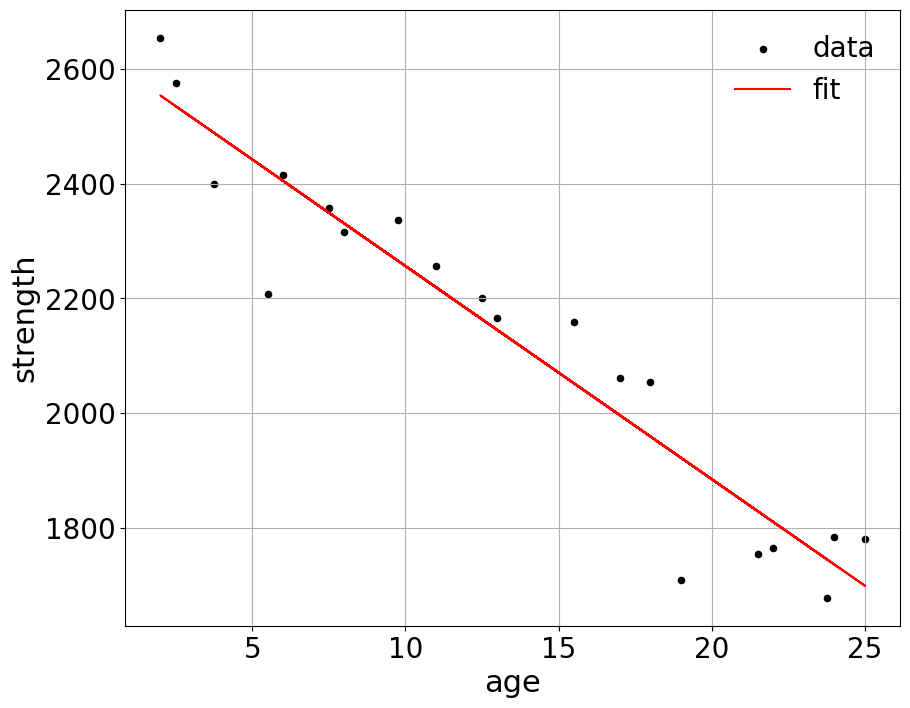

In [11]:
_, ax = plt.subplots()

result_df.plot.scatter(ax=ax, x='age', y='strength', color='k', label='data')
result_df.plot(ax=ax, x='age', y='yhat', color='r', label='fit')
ax.grid()
ax.legend(frameon=False)

In [12]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [13]:
model = smf.ols(formula='strength ~ age', data=e2p1_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               strength   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     165.4
Date:                Tue, 17 Sep 2024   Prob (F-statistic):           1.64e-10
Time:                        08:45:32   Log-Likelihood:                -118.63
No. Observations:                  20   AIC:                             241.3
Df Residuals:                      18   BIC:                             243.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2627.8224     44.184     59.475      0.000    2534.995    2720.649
age          -37.1536      2.889    -12.860      0.000     -43.223     -31.084
==============================================================================
Omnibus:                        6.304   Durbin-Watson:                   1.842
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.281
Skew:                          -1.109   Prob(JB):                        0.118
Kurtosis:                       3.464   Cond. No.                         31.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
age,1.527483e+06,1.0,165.376758,1.643344e-10
Residual,1.662549e+05,18.0,NaN,NaN


In [15]:
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
age,1.0,1.527483e+06,1.527483e+06,165.376758,1.643344e-10
Residual,18.0,1.662549e+05,9.236381e+03,NaN,NaN


In [16]:
sm.stats.anova_lm(model, typ=3)

,sum_sq,df,F,PR(>F)
Intercept,3.267123e+07,1.0,3537.233102,4.063559e-22
age,1.527483e+06,1.0,165.376758,1.643344e-10
Residual,1.662549e+05,18.0,NaN,NaN


### 2.2.2 Properties of the Least-Squares Estimators and the Fitted Regression Model
___

Estimate $\sigma^2$ with

\begin{align*}
\sqh = \sse &= \sumi e_i^2 \\
            &= \sumi (y_i - \yhat_i)^2 \\
            &= \sumi y_i - n \ybar^2 - \boh \Sxx  \\
            &= \sumi (y_i - \ybar)^2 - \boh \Sxx  \\
            &= \sst - \boh \Sxx 
\end{align*}

Where **corrected sum of squares**, $\sst$, is defined as 
\begin{align*}
\sst = \sumi (y_i - \ybar)^2
\end{align*}

It can be shown that $\exp{\sse} = (n-2)\sigma^2$ so an **unbiased estimator** for $\sigma^2$ is

\begin{align*}
\mse = \sqh = \frac{\sse}{n - 2}
\end{align*}

**note** $\sse$ has $n-2$ degrees of freedom:
 * $n$ for the $y_i$'s
 * 2 contraints for $\bzh$ and $\boh$ since they are dependent on the $y_i$'s

#### Example 2.2: Estimate $\sigma^2$ for the rocket data.

In [17]:
from lra.simple_linear_regression import *

In [18]:
sst = ((y - y.mean())**2).sum()
sst

np.float64(1693737.601375)

In [19]:
sst = SST(y)
sst

np.float64(1693737.6014)

In [20]:
sse = SSE(x, y)
sse

np.float64(166254.4849)

In [21]:
mse = MSE(x, y)
mse

np.float64(9236.3603)

## 2.3 HYPOTHESIS TESTING ON THE SLOPE AND INTERCEPT
___

### 2.3.2 Testing Significance of Regression

To test the **significance of regressions**, use the following test:

\begin{align*}
H_0:\ \beta_1 &= 0 \\
H_1:\ \beta_1 &\neq 0
\end{align*}

Failing to reject $H_0$ implies that there is a linear relationaship between $x$ and $y$.

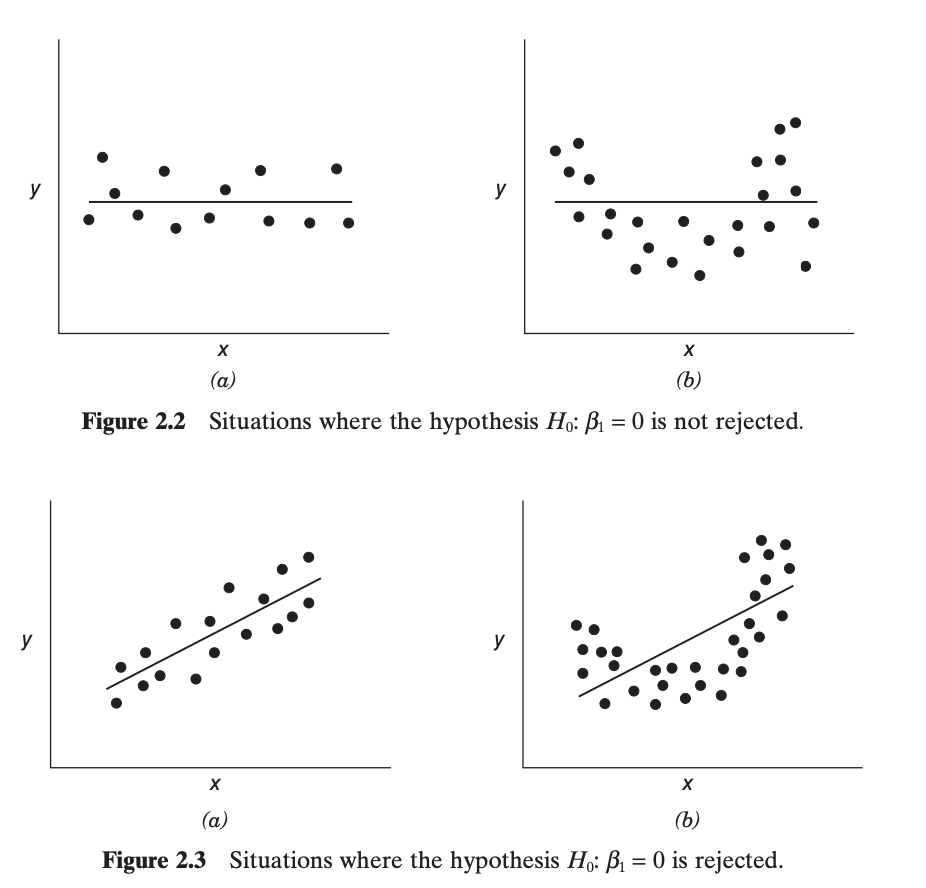

The test procedure is to construct your $t-$test:

\begin{align*}
t_0 = \frac{\boh}{\text{se}\left(\boh\right)}
\end{align*}

where

\begin{align*}
\text{se}\left(\boh\right) &= \sqrt{\frac{\sqh}{\Sxx}} \\
                           &= \sqrt{\frac{\mse}{\Sxx}}
\end{align*}

The null hypothesis of significance of regression would be rejected if $|t_0| > t_{\alpha/2,n−2}$.

#### Example 2.3 Test the Rocket Propellant Data regression significance

In [22]:
TTest(x, y, alpha=0.05, ndec=2)

{'n': 20,
 't0': np.float64(-12.85),
 't_value': np.float64(2.1),
 'p_value': np.float64(1.6641044098264501e-10),
 'reject': np.True_}

In [23]:
beta1 = Beta_1(x, y, 2)
se = se_Beta1(x, y, 2)
t0 = beta1 / se
t0

np.float64(-12.854671280276815)

In [24]:
from scipy.stats import t

n = len(x)
alpha = 0.05
t_value = np.round(t(n-2).ppf(1 - alpha / 2), 3)
t_value

np.float64(2.101)

In [25]:
np.abs(t0) > t_value

np.True_

### Example 2.3.3 Analysis of Variance (ANOVA) 

Write

\begin{align*}
y_i − \ybar = (\yhat_i - \ybar) + (y_i - \yhat_i)
\end{align*}

Squaring both sides and summing over the $n$ examples produces

\begin{align*}
\sumi (y_i − \ybar) = \sum_i (\yhat_i - \ybar)^2 + \sumi (y_i - \yhat_i)^2 + 2 \sumi (\yhat_i - \ybar)(y_i - \yhat_i)
\end{align*}

The cross term vanishes and you're left with

\begin{align*}
\sumi (y_i − \ybar) &= \sum_i (\yhat_i - \ybar)^2 + \sumi (y_i - \yhat_i)^2  \\
\sst &= \ssr + \sse 
\end{align*}

**Analysis of the Variance for Testing Signficance of Regression:

Source of Variation | Sum of Squares | Degree of Freedom| Mean square | $F_0$ | $P$-value | test
--- | :--- | :---: | :---: | :---: | :---:| :---:
*Regression* | $\ssr = \boh \Sxy$ | 1 | $\msr$ | $\frac{\msr}{\mse}$ | $\prob{F > F_0} = 1 - \text{CDF}(F_0)$ | reject if $P$-value < $\alpha$
*Residual* | $\sse = \sst - \boh \Sxy$ | n -2 | $\mse$ | | |
*Total* | $\sst$ | n -1 |  | | |

#### Example 2.4 The Rocket Propellant Data ANOVA

In [30]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
age,1.527483e+06,1.0,165.376758,1.643344e-10
Residual,1.662549e+05,18.0,NaN,NaN


In [31]:
ANOVA(x, y, 0.05, 2)

,source,sum_sq,df,mean_sq,F_0,p_value,reject
0,regression,1527334.95,1,1527334.95,165.21,1.66e-10,True
1,residual,166402.65,18,9244.59,NaN,None,None
2,total,1693737.60,19,NaN,NaN,None,None
